In [1]:
import  psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 conn = psycopg2.connect(
     host='localhost', 
     dbname='cpdp', 
     user='blaine', 
     password='postgres'
 )

In [3]:
query = """
WITH officer_subset AS
    (SELECT o.id, o.first_name, o.last_name, o.birth_year, o.appointed_date,
          date_part('year', '2018-01-01'::DATE) - o.birth_year as estimated_age,
          ('2018-01-01'::DATE - o.appointed_date) / 365 as years_on_force,
          COUNT(a.id) as allegation_count
    FROM data_officer o
    LEFT JOIN data_officerallegation a on o.id = a.officer_id
    WHERE active = 'Yes'
        AND appointed_date BETWEEN '2000-01-01' AND '2007-12-31'
    GROUP BY o.id
    ORDER BY years_on_force DESC)
SELECT years_on_force, AVG(allegation_count)
FROM officer_subset
GROUP by years_on_force
ORDER BY years_on_force;
"""

years_on_force_df = pd.read_sql_query(
    query,
    conn
)

years_on_force_df

,years_on_force,avg
0,10,6.866460
1,11,7.487136
2,12,7.883117
3,13,8.461216
4,14,10.043732
5,15,10.755981
6,16,10.186335
7,17,11.683837


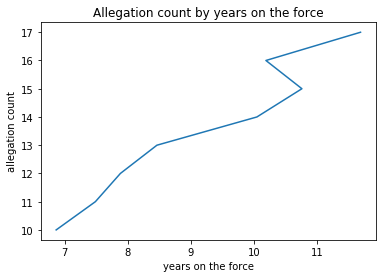

In [14]:
plt.plot(years_on_force_df['avg'], years_on_force_df['years_on_force'])
plt.title('Allegation count by years on the force')
plt.xlabel('years on the force')
plt.ylabel('allegation count')
plt.savefig('images/allegation_count_years_on_force.png')

In [8]:
query = """
SELECT year_on_force, COUNT(id)::DECIMAL / COUNT(DISTINCT officer_id)::DECIMAL as avg
FROM officer_allegations_years_on_force
WHERE year_on_force >= 0 AND year_on_force < 10
GROUP BY year_on_force
ORDER BY year_on_force ASC;
"""

avg_years_on_force = pd.read_sql_query(
    query,
    conn
)

avg_years_on_force

,year_on_force,avg
0,0,1.423017
1,1,1.702419
2,2,1.973951
3,3,2.114428
4,4,2.048758
5,5,1.983984
6,6,1.982043
7,7,1.915679
8,8,1.737226
9,9,1.684654


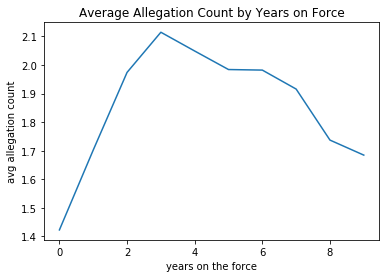

In [13]:
plt.plot(avg_years_on_force['year_on_force'], avg_years_on_force['avg'])
plt.title('Average Allegation Count by Years on Force')
plt.xlabel('years on the force')
plt.ylabel('avg allegation count')
plt.savefig('images/avg_allegation_count_years_on_force.png')

In [10]:
query = """
SELECT year_since_first, COUNT(id)::DECIMAL / COUNT(DISTINCT officer_id)::DECIMAL AS avg
FROM officer_allegations_years_on_force
WHERE year_since_first >= 0 AND year_since_first < 10
GROUP BY year_since_first
ORDER BY year_since_first ASC;
"""

avg_years_since_first = pd.read_sql_query(
    query,
    conn
)

avg_years_since_first

,year_since_first,avg
0,0,2.126984
1,1,2.090538
2,2,2.060550
3,3,2.098717
4,4,2.023891
5,5,1.932911
6,6,1.847507
7,7,1.797274
8,8,1.671371
9,9,1.644699


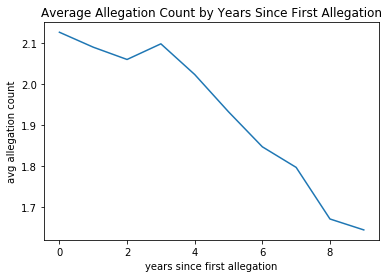

In [12]:
plt.plot(avg_years_since_first['year_since_first'], avg_years_since_first['avg'])
plt.title('Average Allegation Count by Years Since First Allegation')
plt.xlabel('years since first allegation')
plt.ylabel('avg allegation count')
plt.savefig('images/avg_allegation_count_years_since_first.png')